In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("owid-covid-data.csv")
df['date'] = pd.to_datetime(df['date'],format ="%m/%d/%Y") #Converting to accessible format
df.index=df['date']
#df.drop('date',axis=1,inplace=True)
df.head()

C:\Users\Aashutosh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-03-13,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2020-03-19,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2020-03-20,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2020-03-21,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2020-03-22,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [5]:
df[df['new_deaths']==df['new_deaths'].max()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-04-16,OWID_WRL,NaN,World,2020-04-16,2045923.0,78348.0,77168.857,140122.0,10491.0,7048.429,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,NaN


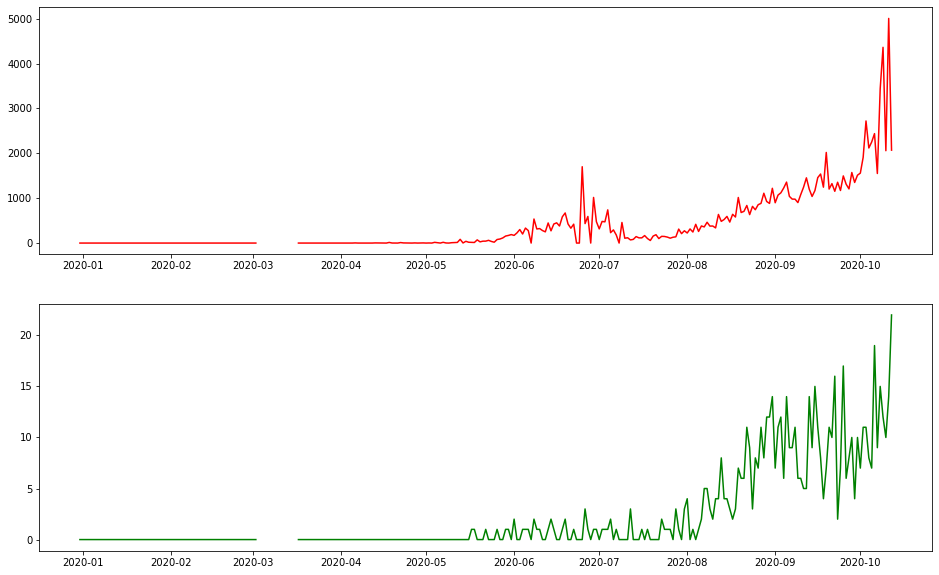

In [6]:
fig,axes = plt.subplots(nrows=2,ncols=1,figsize = (16,10))

axes[0].plot(df.loc[df['location']=='Nepal']['new_cases'],color='red')
axes[1].plot(df.loc[df['location']=='Nepal']['new_deaths'],color='green')

plt.show()

In [7]:
df['location'].nunique()

212

In [8]:
df['location'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Bonaire Sint Eustatius and Saba',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt',
       'Eritrea', 'Western Sahara', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'Falkland Islands', 'France',

Text(0.5, 1.0, 'Daily New Cases in USA')

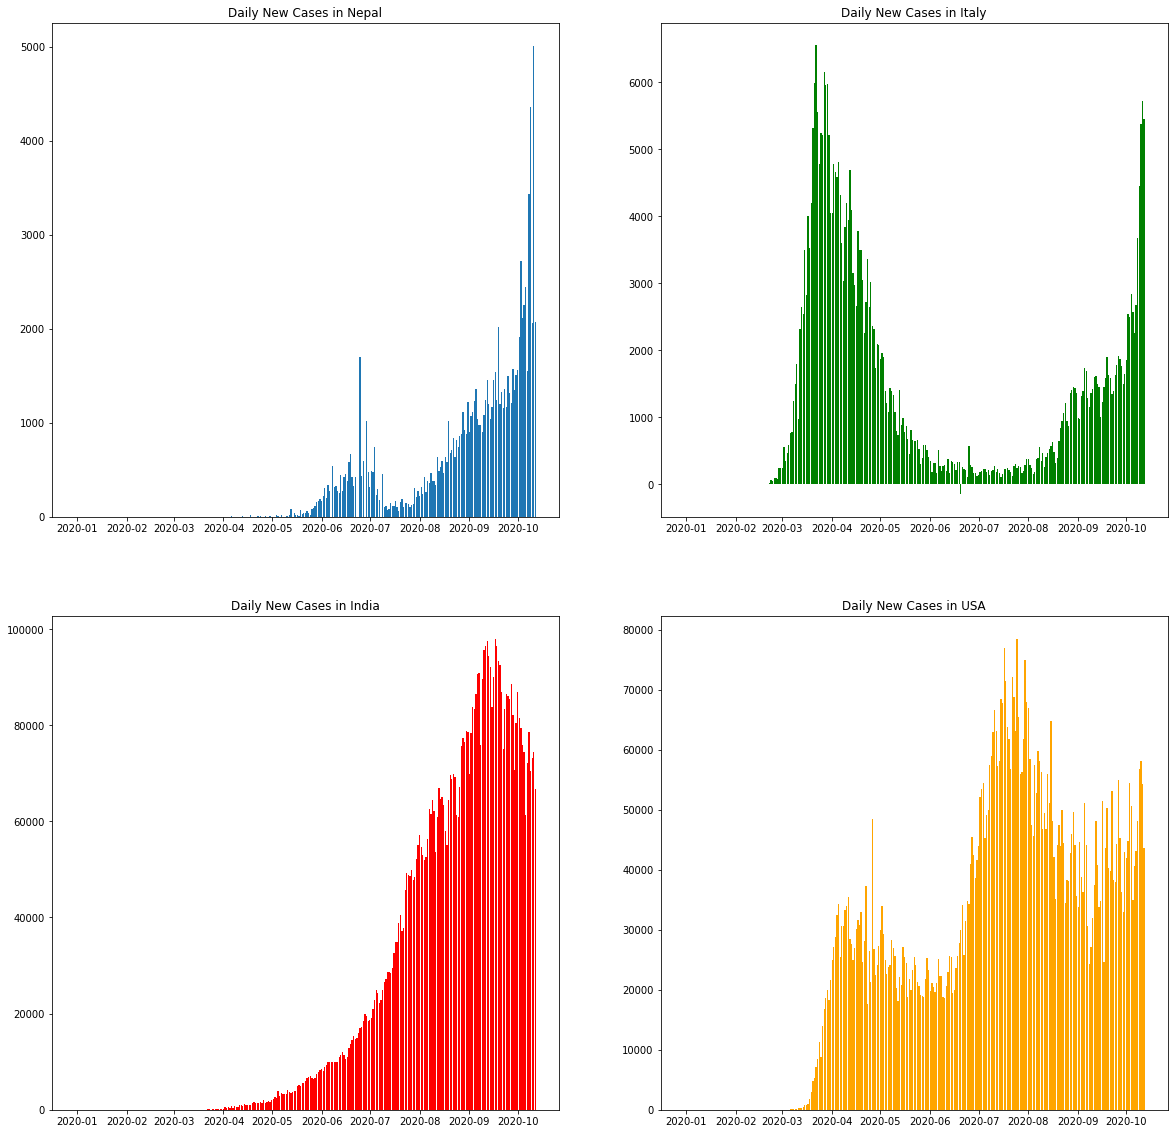

In [9]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(20,20))

nepal_new_cases = df.loc[df['location']=='Nepal']['new_cases']
italy_new_cases = df.loc[df['location']=='Italy']['new_cases']
india_new_cases = df.loc[df['location']=='India']['new_cases']
usa_new_cases = df.loc[df['location']=='United States']['new_cases']
date = df.loc[df['location']=='Nepal']['date']

axes[0,0].bar(date,nepal_new_cases)
axes[0,0].set_title('Daily New Cases in Nepal')

axes[0,1].bar(date,italy_new_cases,color='green')
axes[0,1].set_title('Daily New Cases in Italy')

axes[1,0].bar(date,india_new_cases,color='red')
axes[1,0].set_title('Daily New Cases in India')

axes[1,1].bar(date,usa_new_cases,color='orange')
axes[1,1].set_title('Daily New Cases in USA')

In [10]:
df_countries = df.loc['2020-04-12']
#df_countries = df.loc['2020-04-12'][['location','new_cases','new_deaths','gdp_per_capita','cardiovasc_death_rate','life_expectancy','population_density']]
df_countries = df_countries[df_countries.location != 'International']
df_countries

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-04-12,ABW,North America,Aruba,2020-04-12,92.0,6.0,4.000,0.0,0.0,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2020-04-12,AFG,Asia,Afghanistan,2020-04-12,555.0,34.0,40.714,18.0,3.0,1.857,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.498
2020-04-12,AGO,Africa,Angola,2020-04-12,19.0,0.0,1.286,2.0,0.0,0.000,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
2020-04-12,AIA,North America,Anguilla,2020-04-12,3.0,0.0,0.000,0.0,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.88,NaN
2020-04-12,ALB,Europe,Albania,2020-04-12,433.0,17.0,14.286,23.0,0.0,0.571,...,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-12,YEM,Asia,Yemen,2020-04-12,1.0,0.0,NaN,0.0,0.0,NaN,...,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452
2020-04-12,ZAF,Africa,South Africa,2020-04-12,2028.0,25.0,63.286,25.0,1.0,2.286,...,12294.876,18.9,200.380,5.52,8.100,33.200,43.993,2.320,64.13,0.699
2020-04-12,ZMB,Africa,Zambia,2020-04-12,40.0,0.0,0.143,2.0,0.0,0.143,...,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588


In [11]:
df_countries.iloc[:,:].corr().style.background_gradient(cmap='Greens').format("{:.3f}")

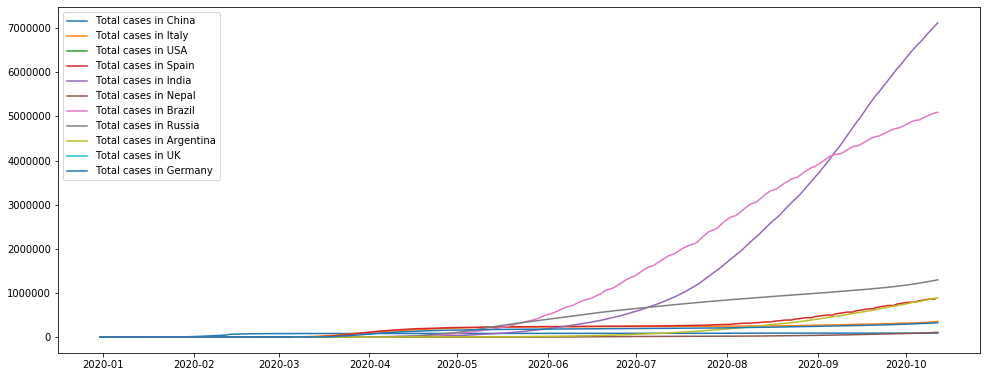

In [52]:
fig = plt.figure(figsize=(16,6))
axes = fig.add_axes([0.1,0.1,0.8,0.8])
countries = ['China','Italy','USA','Spain','India','Nepal','Brazil','Russia','Argentina','UK','Germany']
for i in range(len(countries)):
    axes.plot(df.loc[df['location']==countries[i]]['total_cases'],label='Total cases in {}'.format(countries[i]))
    axes.legend()